# SURUTHI S
# 225229141
# PDL LAB 15
# Text dataset creation and design of Simple RNN for Sentiment Analysis

In [ ]:
import tensorflow
import keras
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Activation,Dropout,SpatialDropout1D,Bidirectional,LSTM,SimpleRNN
from tensorflow.keras.layers import Conv1D,MaxPooling1D,GlobalAveragePooling1D,GlobalMaxPooling1D

import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/imdb.csv").sample(500).reset_index()


In [ ]:
df

,index,review,sentiment
0,35640,Adela is a rebellious teenager with the attitu...,negative
1,5060,"Unfortunately, this film is typical of the wat...",negative
2,39115,"You know, as you get older, you somehow think ...",negative
3,10376,"When you read the summary of this film, you mi...",positive
4,41625,"As far as HEIST movies go, this one is pretty ...",negative
...,...,...,...
495,47304,Even though The Shining is over a quarter of a...,positive
496,13869,"""Die Sieger"" was highly recommended to be one ...",negative
497,27116,This film may have been the biggest let-down I...,negative
498,29571,I was really surprised to see that unlike most...,positive


In [ ]:
df['sentiment'].value_counts()

negative    267
positive    233
Name: sentiment, dtype: int64

In [ ]:
y = np.array([1 if label == 'positive' else 0 for label in df['sentiment']])

In [ ]:
y

In [ ]:
X_train

In [ ]:
# downloading nltk dependencies
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
all_stopwords = stopwords.words('english')
negation = ['no','not']
all_stopwords = [w for w in all_stopwords if w not in negation]

def preprocessing(data):
    corpus = []
    for i in range(len(data)):
        # remove urls
        tweet = re.sub(r'http\S+', ' ', data[i]) # links

        # remove html tags
        tweet = re.sub(r'<.*?>', ' ', tweet) # tags
        tweet = re.sub('&\w+([-.]\w+)*', ' ', tweet) # colorcodes

        # remove digits
        tweet = re.sub(r'\d+', ' ', tweet)
        tweet = re.sub('@\w+([-.]\w+)*', ' ', tweet) # mentions

        # remove emojis
        emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
        tweet = emoji_pattern.sub(r'', tweet) # no emoji

        # remove hashtags
        tweet = re.sub(r'#\w+', ' ', tweet) # hashtags
        review = re.sub('[^a-zA-Z]', ' ', tweet) # any characters other than alphabets
        review = review.lower() # casefolding
        review = review.split()
        lemma= WordNetLemmatizer() # lemmatization
        review = [lemma.lemmatize(word) for word in review if word not in all_stopwords]
        review = ' '.join(review)
        corpus.append(review)
    return corpus

In [ ]:
review = preprocessing(df['review'])

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(review,y,test_size=0.30,stratify = y,random_state=42)

In [ ]:
y_train

In [ ]:
token = Tokenizer()
token.fit_on_texts(X_train)

In [ ]:
# Convert text data to sequences of integers
train_sequences = token.texts_to_sequences(X_train)
valid_sequences = token.texts_to_sequences(X_test)

In [ ]:
vocab_size = len(token.word_index)+1
vocab_size

# there are 9049 unique words in the corpus
# we will feed this to the input_dim of embedding layer
# +1 because the index starts from 0

9049

In [ ]:
maxlen = 100 # specifies the maximum length of the sequences after padding or truncating.

X_train = np.array(pad_sequences(train_sequences, maxlen=maxlen,padding = 'post'))
X_test = np.array(pad_sequences(valid_sequences, maxlen=maxlen,padding = 'post'))

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
X_train.shape

(350, 100)

In [ ]:
vec_size = 300

model = Sequential()
model.add(Embedding(input_dim = vocab_size,
                   output_dim = vec_size,
                  input_length=maxlen))

model.add(SimpleRNN(units=16))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 300)          2714700   
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 16)                5072      
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2719789 (10.38 MB)
Trainable params: 2719789 (10.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rnn_history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
11/11 [==============================] - 6s 422ms/step - loss: 0.6912 - accuracy: 0.5429 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 2/10
11/11 [==============================] - 3s 259ms/step - loss: 0.4060 - accuracy: 0.9200 - val_loss: 0.6988 - val_accuracy: 0.5333
Epoch 3/10
11/11 [==============================] - 2s 198ms/step - loss: 0.2483 - accuracy: 0.9943 - val_loss: 0.7114 - val_accuracy: 0.5267
Epoch 4/10
11/11 [==============================] - 3s 254ms/step - loss: 0.1651 - accuracy: 1.0000 - val_loss: 0.7313 - val_accuracy: 0.5067
Epoch 5/10
11/11 [==============================] - 4s 363ms/step - loss: 0.1200 - accuracy: 1.0000 - val_loss: 0.7938 - val_accuracy: 0.4533
Epoch 6/10
11/11 [==============================] - 3s 319ms/step - loss: 0.0895 - accuracy: 1.0000 - val_loss: 0.8317 - val_accuracy: 0.5000
Epoch 7/10
11/11 [==============================] - 2s 204ms/step - loss: 0.0701 - accuracy: 1.0000 - val_loss: 0.8551 - val_accuracy: 0.5000
Epoch 

In [ ]:
import matplotlib.pyplot as plt

def accuracy_plot(history):
  plt.plot(history.history['accuracy'])
  plt.title(" Accuracy ")
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.legend(['Train'],loc='best')
  plt.show()

def loss_plot(history):
  plt.plot(history.history['loss'])
  plt.title(" Loss ")
  plt.ylabel("Loss")
  plt.xlabel("Epochs")
  plt.legend(['Train'],loc='best')
  plt.show()



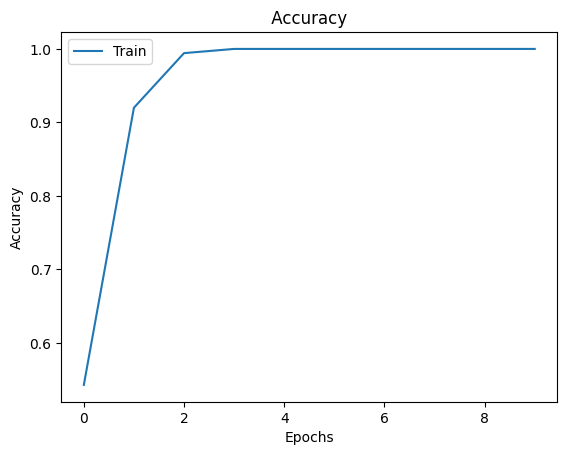

In [ ]:
accuracy_plot(rnn_history)

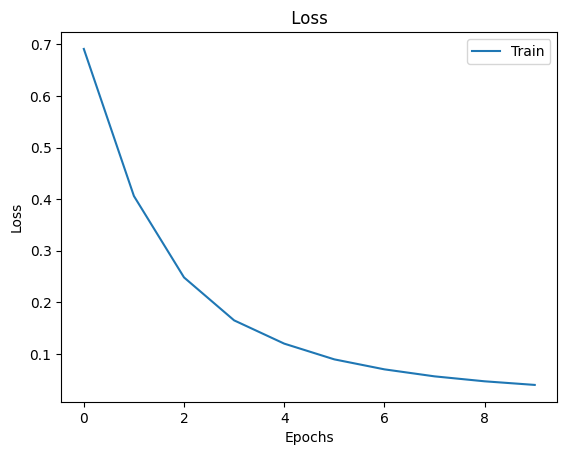

In [ ]:
loss_plot(rnn_history)

In [ ]:
for num_layers in [2, 3, 4]:
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=vec_size, input_length=maxlen))

    # Add SimpleRNN layers
    for _ in range(num_layers):
        model.add(SimpleRNN(units=32, return_sequences=True))  # Use return_sequences for all but the last layer

    model.add(SimpleRNN(units=32))  # Final SimpleRNN layer
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    print(f"Training model with {num_layers} SimpleRNN layers:")
    history = model.fit(X_train, y_train, epochs=10,  validation_data=(X_test, y_test))

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Loss: {loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print()
# This code defines a for loop that iterates through the specified numbers of SimpleRNN layers (2, 3, and 4). For each number of layers, it creates and trains a model, then evaluates its performance.


Training model with 2 SimpleRNN layers:
Epoch 1/10
11/11 [==============================] - 19s 982ms/step - loss: 0.7163 - accuracy: 0.5029 - val_loss: 0.6950 - val_accuracy: 0.5400
Epoch 2/10
11/11 [==============================] - 13s 1s/step - loss: 0.3724 - accuracy: 0.8514 - val_loss: 0.7560 - val_accuracy: 0.5000
Epoch 3/10
11/11 [==============================] - 7s 616ms/step - loss: 0.1495 - accuracy: 0.9543 - val_loss: 0.9039 - val_accuracy: 0.4733
Epoch 4/10
11/11 [==============================] - 6s 470ms/step - loss: 0.0313 - accuracy: 0.9971 - val_loss: 1.2846 - val_accuracy: 0.4733
Epoch 5/10
11/11 [==============================] - 4s 375ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 1.2838 - val_accuracy: 0.4733
Epoch 6/10
11/11 [==============================] - 6s 616ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 1.3196 - val_accuracy: 0.4600
Epoch 7/10
11/11 [==============================] - 4s 386ms/step - loss: 0.0042 - accuracy: 1.0000 - val_los